## Exploring data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = "Data.csv"
df = pd.read_csv(file)
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


## Processing data 

In [2]:
#Select target variables
targets = df.filter(["Genotype","Treatment","Behavior"])

#Drop target variables
df.drop(["Genotype","Treatment","Behavior", "class"], axis = 1, inplace = True)
df.shape

(1080, 78)

In [3]:
#Transforming target variables to dummy variables
targets_dummies = pd.get_dummies(targets, drop_first = True)
targets_dummies

,Genotype_Ts65Dn,Treatment_Saline,Behavior_S/C
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1075,1,1,1
1076,1,1,1
1077,1,1,1
1078,1,1,1


### Create multiindex dataframe 

A multiindex dataframe is created to accurately replace the missing values in the originla dataset

In [4]:
#Extract mouse_index to be used in the creation of a multiindex dataframe
df_mouse_index = df.pop("MouseID").values

#Create a list to be used as a main index reference in the multiindex dataframe
k = []
for n in range(72):
    for s in range(15):
        k.append(n)
main_index = k

#Create multtiindex
df_multiindex = pd.DataFrame(df.values, index = [main_index, df_mouse_index], columns = df.columns.tolist())
df_multiindex


DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0  309_1     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
   309_2     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
   309_3     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
   309_4     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
   309_5     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...               ...       ...       ...       ...       ...       ...   
71 J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
   J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
   J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
   J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
   J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

              pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  \
0  309_1     0.177565   2.373744  0.232224  1.750936  ...  0.188852  0.122652   
   309_2     0.172817   2.292150  0.226972  1.596377  ...  0.200404  0.116682   
   309_3     0.175722   2.283337  0.230247  1.561316  ...  0.193685  0.118508   
   309_4     0.176463   2.152301  0.207004  1.595086  ...  0.192112  0.132781   
   309_5     0.173627   2.134014  0.192158  1.504230  ...  0.205604  0.129954   
...               ...        ...       ...       ...  ...       ...       ...   
71 J3295_11  0.171262   2.483740  0.207317  1.057971  ...  0.275547  0.190483   
   J3295_12  0.182496   2.512737  0.216339  1.081150  ...  0.283207  0.190463   
   J3295_13  0.161435   1.989723  0.185164  0.884342  ...  0.290843  0.216682   
   J3295_14  0.173623   2.086028  0.192044  0.922595  ...  0.306701  0.222263   
   J3295_15  0.191811   2.361816  0.223632  1.064085  ...  0.292330  0.227606   

             BCL2_N     pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  \
0  309_1        NaN  0.106305  0.108336  0.427099   0.114783  0.131790   
   309_2        NaN  0.106592  0.104315  0.441581   0.111974  0.135103   
   309_3        NaN  0.108303  0.106219  0.435777   0.111883  0.133362   
   309_4        NaN  0.103184  0.111262  0.391691   0.130405  0.147444   
   309_5        NaN  0.104784  0.110694  0.434154   0.118481  0.140314   
...             ...       ...       ...       ...        ...       ...   
71 J3295_11     NaN  0.115806  0.183324  0.374088   0.318782  0.204660   
   J3295_12     NaN  0.113614  0.175674  0.375259   0.325639  0.200415   
   J3295_13     NaN  0.118948  0.158296  0.422121   0.321306  0.229193   
   J3295_14     NaN  0.125295  0.196296  0.397676   0.335936  0.251317   
   J3295_15     NaN  0.118899  0.187556  0.420347   0.335062  0.252995   

             H3MeK4_N    CaNA_N  
0  309_1     0.128186  1.675652  
   309_2     0.131119  1.743610  
   309_3     0.127431  1.926427  
   309_4     0.146901  1.700563  
   309_5     0.148380  1.839730  
...               ...       ...  
71 J3295_11  0.328327  1.364823  
   J3295_12  0.293435  1.364478  
   J3295_13  0.355213  1.430825  
   J3295_14  0.365353  1.404031  
   J3295_15  0.365278  1.370999  

[1080 rows x 77 columns]

The multiindex dataframe created above is useful for a better replacing of th NaN values because we can create more specific values according to each mouse used to generate the samples.

<AxesSubplot:ylabel='columns'>

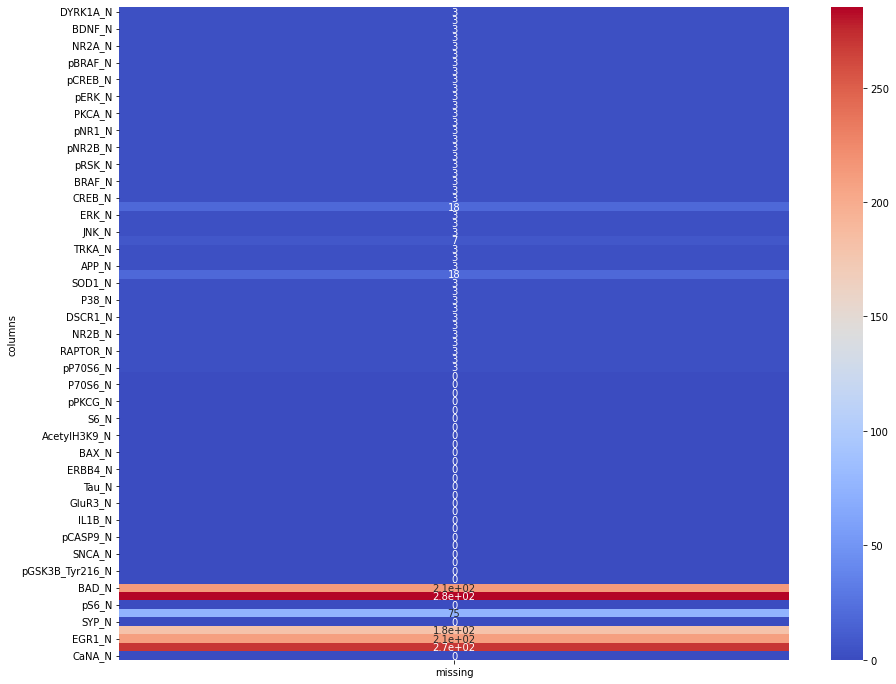

In [5]:
#Creating a dataframe of missing values to visualize
miss_vals = pd.DataFrame()
miss_vals["columns"] = df_multiindex.columns.tolist()

values = []
for col in df_multiindex.columns.tolist():
    values.append(df_multiindex[col].isnull().sum())

miss_vals["missing"] = values
miss_vals = miss_vals.set_index("columns")

import matplotlib.pyplot as plt

plt.figure(figsize = (15,12))
sns.heatmap(miss_vals, cmap = "coolwarm",annot = True)

### Replacing missing values

In [6]:
for index in range(df_multiindex.index[-1][0] + 1):
    means = np.mean(df_multiindex.loc[index,:], axis = 0).tolist()
    for col in df_multiindex.columns.tolist():
        #create a list with the names of the columns and define the position of the column currently selected by the for loop above
        position = df_multiindex.columns.tolist().index(col)
        df_multiindex.loc[index][col].fillna(means[position], inplace = True)                         
        if df_multiindex.loc[index][col].isnull().sum() != 0:
            #37 is chosen becase it's the limit between control and trisomic mouse in the order of the dataframe
            if index <= 37: 
                means = np.mean(df_multiindex.loc[:37], axis = 0).tolist()
                df_multiindex.loc[index][col].fillna(means[position], inplace = True)
            else:
                means = np.mean(df_multiindex.loc[38:], axis = 0).tolist()
                df_multiindex.loc[index][col].fillna(means[position], inplace = True)
    
df_multiindex.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 77, dtype: int64

## Classification using decision trees 

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

X = df_multiindex.copy()
print('{:^16} | {:^40} |'.format('TARGET', ' MAX DEPTH & ACCURACIES'))
for var in targets_dummies.columns.tolist():
    scores = {}
    for max_depth in [n for n in range(1,5)]:
        y = targets_dummies[var]
        tree_model = DecisionTreeClassifier()
        cv = ShuffleSplit(test_size = 0.3)
        mean_accuracies = round(cross_val_score(estimator = tree_model, X = X, y = y, scoring = "accuracy").mean(),3)
        scores[max_depth] = mean_accuracies
    print('{:>16} | {} |'.format(var, scores))

     TARGET      |          MAX DEPTH & ACCURACIES          |
 Genotype_Ts65Dn | {1: 0.633, 2: 0.67, 3: 0.668, 4: 0.663} |
Treatment_Saline | {1: 0.621, 2: 0.629, 3: 0.617, 4: 0.603} |
    Behavior_S/C | {1: 0.982, 2: 0.978, 3: 0.973, 4: 0.976} |


In the output above it's notorious the pretty good results obtained from the implementation of the decision tree algorithm for the target variable "Behavior_S/C". Also, we see that as the depth of the decision tree algorithm increases the mean accuracy score obtained improves as well. We'll check for posible overfitting in the particular case of "Behavior_S/C" before going into variable selection.

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(X, targets_dummies["Behavior_S/C"], test_size = 0.3, random_state = 1)
tree_model = DecisionTreeClassifier(max_depth = 4)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print("Accuracy = {:>6.3} | F1= {:>6.3} | Recall = {:>6.3}\n\n".format(accuracy_score(y_test, y_pred),
                                                      f1_score(y_test, y_pred),
                                                      recall_score(y_test, y_pred)))
                                                                                                         
print(f"Accuracy on test set = {accuracy_score(y_test, y_pred)}")

y_train_pred = tree_model.predict(X_train)
print(f"Accuracy on train set = {accuracy_score(y_train, y_train_pred)}")

Accuracy =  0.994 | F1=  0.994 | Recall =  0.994


Accuracy on test set = 0.9938271604938271
Accuracy on train set = 1.0


For the "Behavior_S/C" target, the accuracy score of the the test set  is very high, and therefore the accuracy score of the train set, as we can see, is not be much higher. There's not much difference, so we can say that there is no sign of overfitting and that all set variables are good predictor for that target.  
Let's see if we can get better scoring results for the rest of the targets.

In [75]:
#The same procedure is performed with a reduced selected number of features. For feature selection it is used the 
# RFE algorithm from the sklearn's feature_selection model.
X = df_multiindex.copy()
print('{:^16} | {:^40} |'.format('TARGET', ' MAX DEPTH & ACCURACIES'))
for var in targets_dummies.columns.tolist():
    scores = {}
    for max_depth in [n for n in range(1,5)]:
        y = targets_dummies[var]
        tree_model = DecisionTreeClassifier()
        
        #Perform a recursive variable elimnation
        rfe = RFE(estimator = tree_model, n_features_to_select = 5, step = 1)
        rfe.fit(X, y)
        selected_features = rfe.get_support(1)
        X = X.iloc[:,selected_features]
        cv = ShuffleSplit(test_size = 0.3)
        mean_accuracies = round(cross_val_score(estimator = tree_model, X = X, y = y, scoring = "accuracy").mean(),3)
        scores[max_depth] = mean_accuracies
    print('{:>16} | {} |'.format(var, scores))

     TARGET      |          MAX DEPTH & ACCURACIES          |
 Genotype_Ts65Dn | {1: 0.812, 2: 0.816, 3: 0.821, 4: 0.818} |
Treatment_Saline | {1: 0.491, 2: 0.489, 3: 0.486, 4: 0.481} |
    Behavior_S/C | {1: 0.677, 2: 0.654, 3: 0.676, 4: 0.662} |


The results show that using RFE selecting feature causes the accuracy scoring for target variable "Behavior_S/C" to decrease. Quite contrary happens with the target "Genotype_Ts65Dn", that shows an increase in the scoring after the feature selection. Nevertheless, even with this increase the highest accuracy values are still those obtained with the whole variables in the dataset.

## Fitting logistic regression model 

In [64]:
from sklearn.linear_model import LogisticRegression

X = df_multiindex.copy()
print('{:^16} | {:^15} | {:^20} |'.format('TARGET', 'MEAN ACCURACY', 'CONFIDENCE INTERVAL'))
for var in targets_dummies.columns.tolist():
    scores = []
    y = targets_dummies[var]
    regressor = LogisticRegression(solver = "lbfgs", multi_class = "auto", max_iter = 1000)
    num_folds = 6
    accuracies = cross_val_score(estimator = regressor, X = X, y = y, cv = num_folds, scoring = "accuracy")
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    std_err = std_accuracy / np.sqrt(num_folds)
    scores.append(mean_accuracy)
    print(f"{var:<16} | {mean_accuracy:^15.3} | {mean_accuracy - 1.96 * std_err:>9.3} ~ {mean_accuracy + 1.96 * std_err:<8.3} |")
    #Calcule confidence interval


     TARGET      |  MEAN ACCURACY  | CONFIDENCE INTERVAL  |
Genotype_Ts65Dn  |      0.669      |     0.593 ~ 0.744    |
Treatment_Saline |      0.555      |       0.5 ~ 0.609    |
Behavior_S/C     |      0.997      |     0.992 ~ 1.0      |


Again, for the target "Behavior_S/C", the fitted logistic regression model shows good scoring results upon the entire dataset, ranging from 0.99 to 1.0. Let's see if the same happens performing some feature selection.

In [74]:
X = df_multiindex.copy()

print('{:^16} | {:^15} | {:^20} |'.format('TARGET', 'MEAN ACCURACY', 'CONFIDENCE INTERVAL'))
for var in targets_dummies.columns.tolist():
    scores = []
    y = targets_dummies[var]
    regressor = LogisticRegression(solver = "lbfgs", multi_class = "auto", max_iter = 1000)
    num_folds = 6
    
    rfe = RFE(estimator = regressor, n_features_to_select = 5, step = 1)
    rfe.fit(X, y)
    selected_features = rfe.get_support(1)
    X = X.iloc[:,selected_features]
    cv = ShuffleSplit(test_size = 0.3)
    accuracies = cross_val_score(estimator = tree_model, X = X, y = y, scoring = "accuracy")
    mean_accuracies = accuracies.mean()
    std_accuracy = np.std(accuracies)
    std_err = std_accuracy / np.sqrt(num_folds)
    scores.append(mean_accuracies)
    
    print(f"{var:>16} | {mean_accuracies:^15.3} | {mean_accuracies - 1.96 * std_err:>9.3} ~ {mean_accuracy + 1.96 * std_err:<8.3} |")
    print(f"{var:>16} | {mean_accuracies:^15.3} | {mean_accuracies - 2.015 * std_err:>9.3} ~ {mean_accuracy + 2.015 * std_err:<8.3} |")
   

     TARGET      |  MEAN ACCURACY  | CONFIDENCE INTERVAL  |
 Genotype_Ts65Dn |      0.731      |     0.692 ~ 1.04     |
 Genotype_Ts65Dn |      0.731      |     0.691 ~ 1.04     |
Treatment_Saline |      0.545      |     0.509 ~ 1.03     |
Treatment_Saline |      0.545      |     0.508 ~ 1.03     |
    Behavior_S/C |      0.804      |     0.768 ~ 1.03     |
    Behavior_S/C |      0.804      |     0.767 ~ 1.03     |
